In [3]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [10]:
IMAGE_SIZE=256
BATCH_SIZE = 32
CHANNELS=3

In [7]:
dataset= tf.keras.preprocessing.image_dataset_from_directory("PlantVillage",shuffle=True,
                                                    image_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                    batch_size = BATCH_SIZE)

Found 2152 files belonging to 3 classes.


In [8]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [9]:
len(dataset)

68

In [13]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 2 1 1 1 1 0]


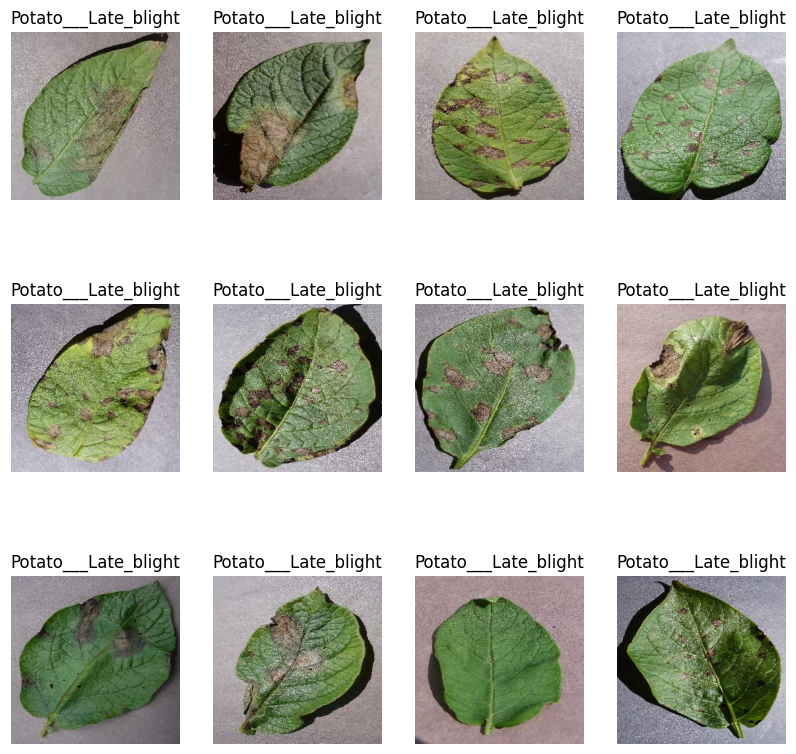

In [20]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
  for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")
    

In [21]:
len(dataset)

68

In [23]:
train_size =0.8
len(dataset)*train_size

54.400000000000006

In [24]:
train_ds = dataset.take(54)
len(train_ds)

54

In [25]:
test_ds= dataset.skip(54)
len(test_ds)


14

In [26]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [28]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [29]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [30]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True,shuffle_size=10000):
    ds_size=len(ds)

    train_size =int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    train_ds = ds.take(train_size)

    val_ds=ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [31]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [32]:
len(train_ds)

54

In [33]:
len(val_ds)

6

In [34]:
len(test_ds)

8

In [35]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [38]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [44]:
data_augmentation= tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [45]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3
model= models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation ='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

C:\Users\subik\.anaconda\python\envs\machinelearning\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_2 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [50]:
EPOCHS=50
history= model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 35s 569ms/step - accuracy: 0.4314 - loss: 0.9652 - val_accuracy: 0.7031 - val_loss: 0.7272
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 30s 557ms/step - accuracy: 0.7249 - loss: 0.6883 - val_accuracy: 0.7865 - val_loss: 0.4884
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 29s 536ms/step - accuracy: 0.7659 - loss: 0.4962 - val_accuracy: 0.8125 - val_loss: 0.5475
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 31s 577ms/step - accuracy: 0.8592 - loss: 0.3767 - val_accuracy: 0.8229 - val_loss: 0.3525
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 33s 617ms/step - accuracy: 0.8696 - loss: 0.3123 - val_accuracy: 0.8646 - val_loss: 0.3569
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 35s 642ms/step - accuracy: 0.9150 - loss: 0.2332 - val_accuracy: 0.9167 - val_loss: 0.1855
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 38s 707ms/step - accuracy: 0.9167 - loss: 0.2165 - val_accuracy: 0.9115 - val_loss: 0.2087
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 36s 673ms/step - accuracy: 0.9359 - loss: 0.1707 - val_accu

In [53]:
scores=model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.9872 - loss: 0.0278 


In [54]:
scores

[0.030446922406554222, 0.982758641242981]

In [55]:
history

In [56]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [57]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [58]:
history.history['accuracy']

[0.49884259700775146,
 0.7528935074806213,
 0.8043981194496155,
 0.8622685074806213,
 0.8703703880310059,
 0.9126157164573669,
 0.921875,
 0.9346064925193787,
 0.9293981194496155,
 0.9265046119689941,
 0.9403935074806213,
 0.9496527910232544,
 0.9525462985038757,
 0.9496527910232544,
 0.9635416865348816,
 0.9519675970077515,
 0.9733796119689941,
 0.9612268805503845,
 0.9820601940155029,
 0.9635416865348816,
 0.9809027910232544,
 0.9600694179534912,
 0.9670138955116272,
 0.9849537014961243,
 0.9565972089767456,
 0.9878472089767456,
 0.9837962985038757,
 0.984375,
 0.9722222089767456,
 0.9837962985038757,
 0.9814814925193787,
 0.9890046119689941,
 0.9832175970077515,
 0.9820601940155029,
 0.9855324029922485,
 0.9780092835426331,
 0.9890046119689941,
 0.9704861044883728,
 0.9866898059844971,
 0.9947916865348816,
 0.9890046119689941,
 0.9866898059844971,
 0.9820601940155029,
 0.9913194179534912,
 0.9878472089767456,
 0.9924768805503845,
 0.9890046119689941,
 0.9901620149612427,
 0.99189811

In [59]:
acc= history.history['accuracy']
val_acc = history.history['val_accuracy']

loss= history.history['loss']
val_loss= history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

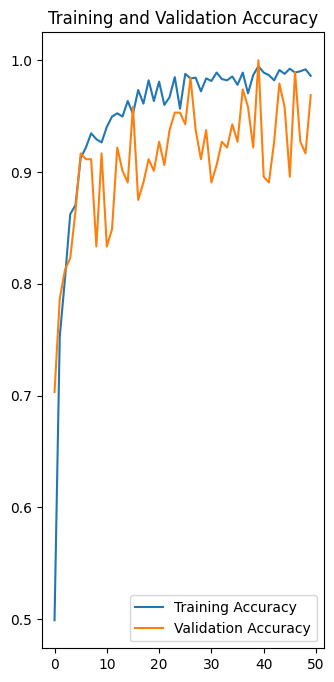

In [61]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label= 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title("Training and Validation Accuracy")

first image to predict
actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
predicted label: Potato___Late_blight


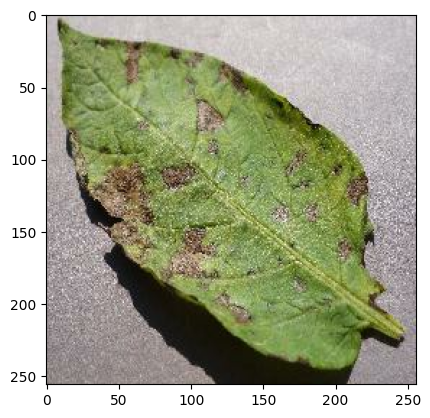

In [88]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image=images_batch[0].numpy().astype('uint8')
    first_label= labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [93]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array= tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class  = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


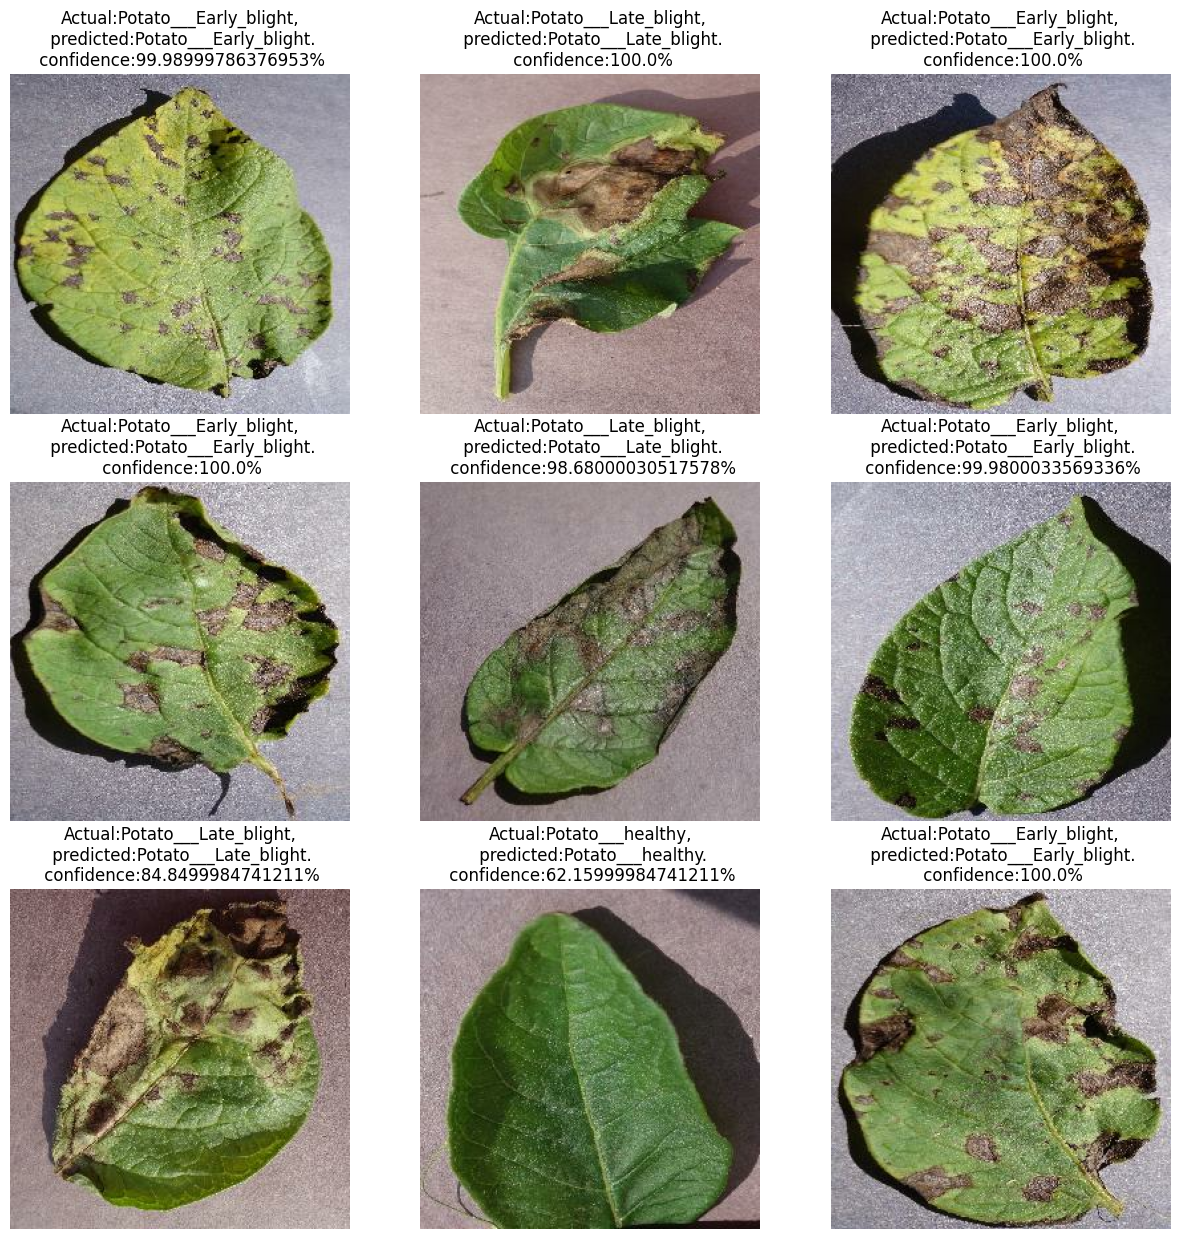

In [95]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual:{actual_class},\n predicted:{predicted_class}.\n confidence:{confidence}%")
        plt.axis("off")

In [97]:
model_version=1
model.export(f"../models/{model_version}") 

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets


Saved artifact at '../models/1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  2373724275920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2373724276304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2373724277456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2373724278224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2373724275344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2373724277072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2373724278992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2373724279952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2373724278416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2373724280720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2373724280528: TensorSpec(shape=(), dty

In [98]:
import os
os.listdir("../models/")

['1']